In [126]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

#### Classes 
- 0=Angry
- 1=Disgust 
- 2=Fear 
- 3=Happy 
- 4=Sad
- 5=Surprise 
- 6=Neutral

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image

train.csv contains two columns, "emotion" and "pixels". The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. The "pixels" column contains a string surrounded in quotes for each image. The contents of this string a space-separated pixel values in row major order. test.csv contains only the "pixels" column and your task is to predict the emotion column.

The training set consists of 28,709 examples. The public test set used for the leaderboard consists of 3,589 examples. The final test set, which was used to determine the winner of the competition, consists of another 3,589 examples.

In [2]:
label_map = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

In [3]:
df_train = pd.read_csv(r'E:\Downloads\csv\facial-expressions\train.csv\train.csv')

In [4]:
df_train

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...
28704,2,84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705,0,114 112 113 113 111 111 112 113 115 113 114 11...
28706,4,74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707,0,222 227 203 90 86 90 84 77 94 87 99 119 134 14...


In [183]:
xTemp1 = df_train.loc[df_train.emotion == 0, 'pixels'].values
xTemp2 = df_train.loc[df_train.emotion == 1, 'pixels'].values
xTemp2 = np.repeat(xTemp2, int(xTemp1.shape[0] / xTemp2.shape[0]))
xTemp = np.concatenate((xTemp1,xTemp2), axis = 0)

x = np.zeros((xTemp.shape[0], 2304), dtype=np.float64)

for i in range(xTemp.shape[0]) :
    res = re.findall(r'\w+', xTemp[i])
    x[i] = np.array(res, dtype= np.float64)
    
t1 = df_train.loc[df_train.emotion == 0, 'emotion'].values
t2 = df_train.loc[df_train.emotion == 1, 'emotion'].values
t2 = np.repeat(t2, int(xTemp2.shape[0] / t2.shape[0]))
t = np.concatenate((t1, t2), axis = 0)


In [184]:
x, t = shuffle(x, t)

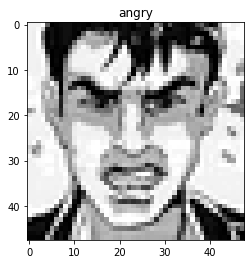

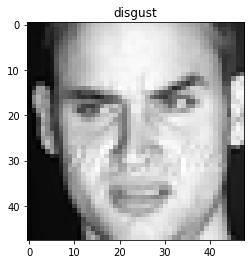

Quit? Y


In [7]:
while True :
    for i in range(2) :
        a, b = x[t == i], t[t == i]
        N = len(a)
        j = np.random.choice(N)
        plt.imshow(a[j].reshape(48, 48), cmap = 'gray')
        plt.title(label_map[b[j]])
        plt.show()
    prompt = input('Quit? ')
    if prompt == 'Y' :
        break

In [146]:
x.shape

(7919, 2304)

In [147]:
t.shape

(7919,)

In [196]:
def sigmoid(z) :
    return 1 / (1 + np.exp(-z))

def forward(x, w, b) :
    return sigmoid(x.dot(w) + b)

def cross_entropy(Y, T) :
    E = 0
    for i in range(len(T)) :
        if T[i] == 1 :
            E -= np.log(Y[i])
        else :
            E -= np.log(1 - Y[i])
    return E

def cross_entropy_2(Y, T) :
    return -np.mean(T.dot(np.log(Y)) + (1 - T).dot(1 - Y))

def classification_rate(Y, T) :
    return (Y == T).mean()

cost 352.00311573122406
1343.4715348359068
775.7264235589439
744.3095814454982
740.4079935465061
739.9129043540897
739.8499494823928
739.841942189714
739.8409237006942
739.8407941524941
739.8407776736656
739.84077557677
739.8407753091691
739.8407752742598
739.840775268971
739.8407752674248
739.8407752663483
739.8407752653485
739.8407752643543
739.8407752633607
739.8407752623679
739.8407752613758
739.840775260384
739.8407752593931
739.8407752584026
739.8407752574126
739.8407752564228
739.8407752554334
739.8407752544448
739.8407752534567
739.8407752524689
739.8407752514817
739.8407752504946
739.8407752495076
739.8407752485209
739.8407752475348
739.8407752465487
739.8407752455629
739.8407752445775
739.8407752435922
739.8407752426073
739.8407752416229
739.8407752406387
739.8407752396547
739.8407752386712
739.8407752376885
739.8407752367059
739.8407752357236
739.8407752347416
739.8407752337598
739.8407752327781
739.8407752317964
739.8407752308152
739.8407752298343
739.8407752288537
739.8407

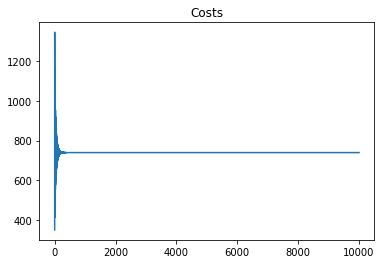

In [197]:
x = x / 255


# randomly initializing the weights
b = 0.5 #bias
D = x.shape[1]
w = np.random.randn(D) / np.sqrt(D)

y = forward(x, w, b).astype(np.float64)

#gradient-descent
costs = []
epochs = 10000
l1 = 0.0001
learning_rate = 0.001
cost = cross_entropy_2(y, t) +  l1 * np.abs(w).mean()
print('cost',cost)
costs.append(cost)

for i in range(epochs) :
    w -= learning_rate * (x.T.dot(y - t) + l1 * np.sign(w))
    b -= learning_rate * (y - t).sum()
    
    y = forward(x, w, b).astype(np.float64)
    cost = cross_entropy_2(y, t) +  l1 * np.abs(w).mean()
    if i % 100 == 0 :
        print(cost)
    costs.append(cost)

print('Final w', w)
print('Final classification rate ', classification_rate(t, y.round()))

plt.plot(costs)
plt.title('Costs')
plt.show()

In [74]:
df_test = pd.read_csv(r'E:\Downloads\csv\facial-expressions\test.csv\test.csv')

In [75]:
df_test

,pixels
0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
1,156 184 198 202 204 207 210 212 213 214 215 21...
2,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
3,205 203 236 157 83 158 120 116 94 86 155 180 2...
4,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...
...,...
7173,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
7174,178 174 172 173 181 188 191 194 196 199 200 20...
7175,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
7176,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


In [86]:
# test_x = np.zeros((df_test.shape[0], 2304), dtype=np.float64)
# for i in range(test_x.shape[0]) :
#     res = re.findall(r'\w+', str(df_test.iloc[i].values))
#     test_x[i] = np.array(res, dtype= np.float64)
test_x = x

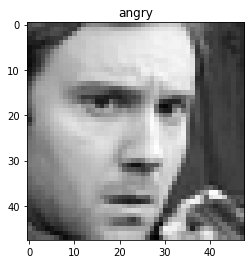

Exit?n


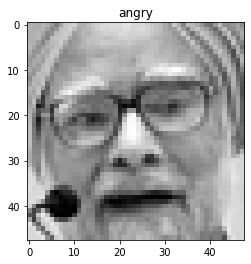

Exit?n


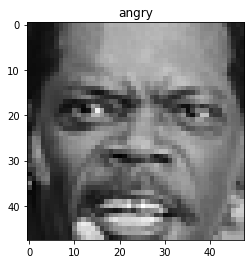

Exit?n


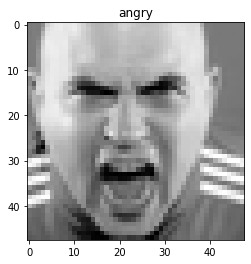

Exit?n


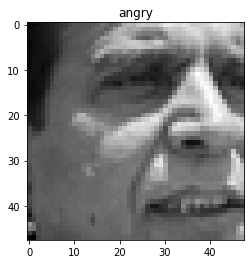

Exit?n


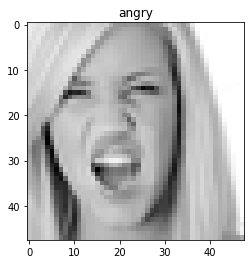

KeyboardInterrupt: Interrupted by user

In [87]:
predict = forward(test_x, w, b).round()

for i in range(test_x.shape[0]) :
    plt.imshow(test_x[i].reshape(48, 48), cmap = 'gray')
    plt.title(label_map[int(predict[i])])
    plt.show()
    
    inp = input('Exit?')
    if inp == 'Y' :
        break

In [131]:
t.shape[0]

4431

In [104]:
m = np.array([1, 2, 3])
np.array([m] * 2).shape

(2, 3)

array(['70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 5

In [143]:
xTemp2.shape[0]

3924